# Note
1. Melakukan percobaan build_models v4.0
2. Running hari Jum'at, 19 Juli 2024
3. Tempat di Kost
4. Data yang digunakan yaitu data augmentasi byPhiard
4. Data meliputi 20 Kelas Aksara Jawa:
- Ba, Ca, Da, Dha, Ga, Ha, Ja, Ka, La, Ma, 
- Na, Nga, Nya, Pa, Ra, Sa, Ta, Tha, Wa, Ya

# Setup Environment 

In [31]:
# pip install tensorflow

In [32]:
# pip install keras

In [33]:
# pip install opencv-python

In [34]:
# pip install imutils

In [35]:
# pip install matplotlib

In [36]:
# pip install seaborn

In [37]:
# pip install scikit-learn

# Import Library

In [1]:
# import pandas as pd
# import matplotlib.pyplot as plt  
# import os
# from os.path import join
# import random
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
# from keras.models import Sequential
# from tensorflow.keras import layers, models
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
# from keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.metrics import classification_report
# import seaborn as sns
# from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [2]:
import os
import pandas as pd
import cv2

def get_last_n_parts(path, n):
    return os.path.join(*path.split(os.sep)[-n:])

def create_labels_csv(DATASET_PATH, OUTPUT_CSV):
    # List to store image file paths and their corresponding labels and dimensions
    data = []

    # Traverse the dataset directory
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                # Get the class label from the subdirectory name
                label = os.path.basename(root)
                # Get the full file path
                file_path = os.path.join(root, file)
                
                # Get image dimensions
                img = cv2.imread(file_path)
                height, width, _ = img.shape
                
                # Get only the last 3 parts of the path for CSV
                csv_path = get_last_n_parts(file_path, 2)
                
                # Append to the data list including dimensions
                data.append([csv_path, width, height, label])
    
    # Create a DataFrame from the data list
    df = pd.DataFrame(data, columns=['file_path', 'width', 'height', 'label'])
    
    # Save the DataFrame to a CSV file in the same directory as the dataset
    output_dir = os.path.dirname(DATASET_PATH)
    output_csv_path = os.path.join(output_dir, OUTPUT_CSV)
    df.to_csv(output_csv_path, index=False)
    print(f'Labels CSV file created at: {output_csv_path}')

# Define the paths for the dataset and the output CSV filename
DATASET_PATH = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\"
OUTPUT_CSV = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\labels.csv"

# Process the dataset
create_labels_csv(DATASET_PATH, OUTPUT_CSV)

Labels CSV file created at: C:\Users\wawn1\projects_skripsi\data\data_preprocessing\v3.5_dataByPhiard\labels.csv


In [3]:
import pandas as pd

# Path ke dua file CSV yang berbeda
path_main = "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\"
file = path_main + "labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,width,height,label
0,ba\ba116.pred3.b_aug_0.png,224,224,ba
1,ba\ba116.pred3.b_aug_1.png,224,224,ba
2,ba\ba116.pred3.b_aug_10.png,224,224,ba
3,ba\ba116.pred3.b_aug_100.png,224,224,ba
4,ba\ba116.pred3.b_aug_101.png,224,224,ba


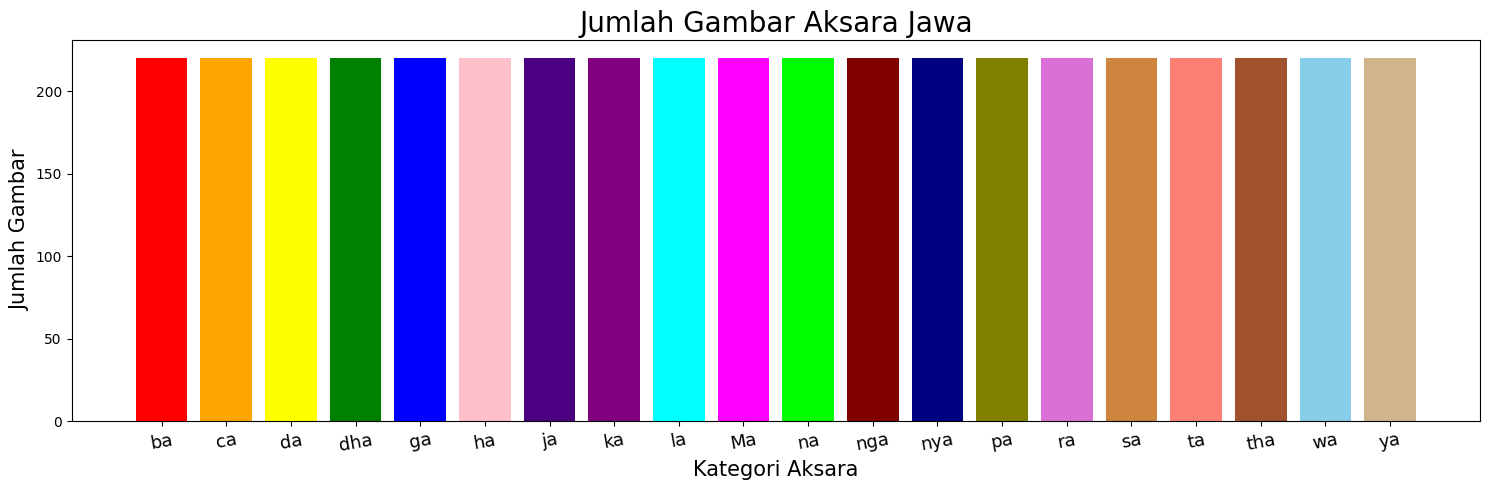

In [9]:
import matplotlib.pyplot as plt
import os

# Define function to count files in each directory
def count_files(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    return num_files

# Define paths for two sources
source_paths = [
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ba",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ca",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\da",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\dha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ja",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ka",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\la",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ma",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\na",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\nga",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\nya",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\pa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ra",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\sa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ta",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\tha",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\wa",
    "C:\\Users\\wawn1\\projects_skripsi\\data\\data_preprocessing\\v3.5_dataByPhiard\\ya"
]

# Count files for each path
file_counts = [count_files(path) for path in source_paths]

# Define the input path aksara
aksara_categories = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'Ma', 'na',
                     'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'pink', 'indigo', 'purple', 
          'cyan', 'magenta', 'lime', 'maroon', 'navy', 'olive', 'orchid', 'peru', 
          'salmon', 'sienna', 'skyblue', 'tan']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(15, 5))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=15)
plt.ylabel('Jumlah Gambar', fontsize=15)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=20)
plt.xticks(fontsize=13, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (32, 32)
INPUT_SHAPE = (32, 32, 1)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Baca dan ubah warna asli
            original_image_resized = cv2.resize(original_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar asli
            grayscale_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            grayscale_image_resized = cv2.resize(grayscale_image, image_size, interpolation=cv2.INTER_AREA)  # Resize gambar grayscale
            image_filtered = apply_custom_preprocessing(grayscale_image_resized)
            
            yield original_image_resized, grayscale_image_resized, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_custom_preprocessing(image):
    # Apply Gaussian Blur
    ApplyGaussian = cv2.GaussianBlur(image, (9, 9), 10.0)
    # Enhance the image sharpness
    img = cv2.addWeighted(image, 1.5, ApplyGaussian, -0.5, 0, image)
    # Apply sharpening filter
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img = cv2.filter2D(img, -1, kernel)
    # Remove noise using median filter
    img = cv2.medianBlur(img, 1)
    # Apply Otsu's thresholding
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Invert the image (background to black, text to white)
    img = 255 - img
    
    return img

# Load images with custom preprocessing applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)

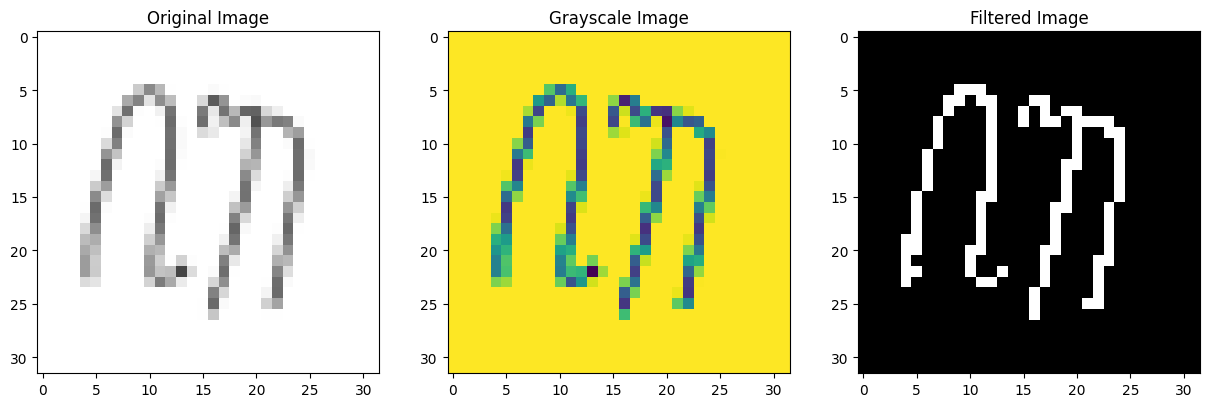

In [11]:
# Select one image to display
index_to_display = 100

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

# Plot the images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('on')

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
plt.imshow(grayscale_image)
plt.axis('on')

plt.subplot(1, 3, 3)
plt.title('Filtered Image')
# plt.imshow(filtered_image, cmap='gray')
plt.imshow(filtered_image, cmap='gray')
plt.axis('on')

plt.show()

In [12]:
# Reshape X_filtered
X_filtered_reshaped = X_filtered.reshape(-1, 32, 32, 1).astype("float32") / 255  # Reshape dan normalisasi
# X_filtered_reshaped = X_filtered.reshape(-1, 112, 112, 1)

print("X_filtered shape after reshape:", X_filtered_reshaped.shape)

X_filtered shape after reshape: (4400, 32, 32, 1)


In [13]:
from sklearn.model_selection import train_test_split

# Tahap pertama: Membagi data menjadi data pelatihan (80%) dan data sementara (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_filtered_reshaped, y_label, test_size=0.2, random_state=45)

# Tahap kedua: Membagi data sementara menjadi data validasi (10%) dan data pengujian (10%)
# Data sementara adalah 20% dari total data, jadi 10% / 20% = 0.5 dari data sementara untuk validasi
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=37)

# Verifikasi ukuran data
print("Ukuran data pelatihan:", X_train.shape, y_train.shape)
print("Ukuran data validasi:", X_val.shape, y_val.shape)
print("Ukuran data pengujian:", X_test.shape, y_test.shape)


Ukuran data pelatihan: (3520, 32, 32, 1) (3520, 20)
Ukuran data validasi: (440, 32, 32, 1) (440, 20)
Ukuran data pengujian: (440, 32, 32, 1) (440, 20)


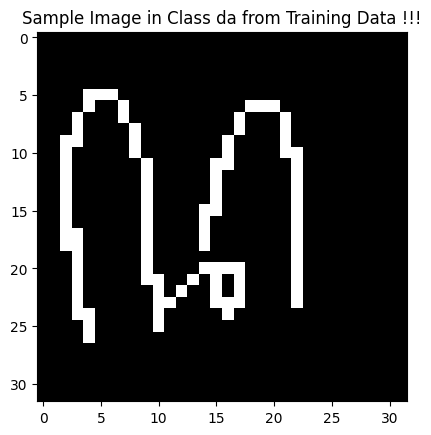

In [15]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_train[0], cmap='gray')
plt.title("Sample Image in Class {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

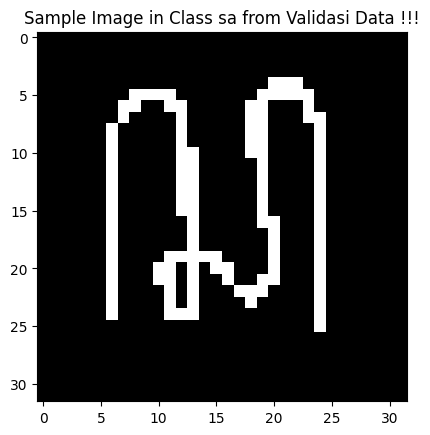

In [16]:
# Menampilkan salah satu gambar dari data validasi
plt.imshow(X_val[0], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_val[0])]))
plt.axis('on')
plt.show()

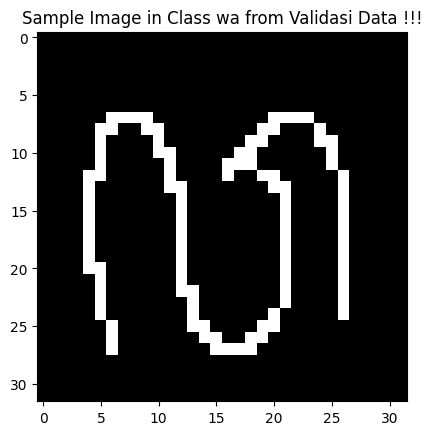

In [17]:
# Menampilkan salah satu gambar dari data pelatihan
plt.imshow(X_test[250], cmap='gray')
plt.title("Sample Image in Class {} from Validasi Data !!!".format(AKSARA[np.argmax(y_test[250])]))
plt.axis('on')
plt.show()

# Build the Model

## Model 1

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import optimizers

# Set hyperparameters tuning
optimizer = 'SGD'
learning_rate = 0.0001
dropout_rate = 0.2
weight_decay = 0.0001
momentum = 0.9
clip_norm = 0.0
num_classes = 20
input_shape = INPUT_SHAPE

def create_model(input_shape, num_classes, optimizer_name, learning_rate, dropout_rate, weight_decay, momentum, clip_norm):
    model = Sequential()

    # Block 1
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 4
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Flatten
    model.add(Flatten())

    # Dense layers
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Define optimizer with hyperparameters
    if optimizer_name == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, decay=weight_decay, clipnorm=clip_norm)
    elif optimizer_name == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate, decay=weight_decay, clipnorm=clip_norm)
    else:
        raise ValueError("Optimizer not supported. Choose from 'SGD', 'Adam', or 'RMSprop'.")

    # Compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model(input_shape=input_shape, num_classes=num_classes, optimizer_name=optimizer, learning_rate=learning_rate, 
                     dropout_rate=dropout_rate, weight_decay=weight_decay, momentum=momentum, clip_norm=clip_norm)

# Print model summary
model.summary()


# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,887,156 (33.90 MB)

 Trainable params: 8,878,324 (33.87 MB)

 Non-trainable params: 8,832 (34.50 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,887,156 (33.90 MB)

 Trainable params: 8,878,324 (33.87 MB)

 Non-trainable params: 8,832 (34.50 KB)

In [20]:
import pandas as pd
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

# Callback for logging to CSV
class CSVLogger(Callback):
    def __init__(self, filename):
        super(CSVLogger, self).__init__()
        self.filename = filename
        self.epoch = 1  # Mulai dari epoch 1

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

In [21]:
# Function to get the last epoch from CSV
def get_last_epoch(filename):
    try:
        df = pd.read_csv(filename)
        last_epoch = df['epoch'].max()
        return last_epoch
    except FileNotFoundError:
        return 0

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=55, min_lr=1e-4)

# Initialize callbacks
csv_logger = CSVLogger("C:\\Users\\wawn1\\projects_skripsi\\save_models\\training_log_v4.3.1_model1.csv")

In [22]:
# Train the model and save the logs to CSV
hist_v1 = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=64,
    callbacks=[
        reduce_lr,
        csv_logger
    ]
)

Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 212s 3s/step - accuracy: 0.0496 - loss: 4.0113 - val_accuracy: 0.0432 - val_loss: 3.0630 - learning_rate: 1.0000e-04 - epoch: 1.0000
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.0611 - loss: 3.7989 - val_accuracy: 0.0432 - val_loss: 3.1862 - learning_rate: 1.0000e-04 - epoch: 2.0000
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.1083 - loss: 3.4383 - val_accuracy: 0.0432 - val_loss: 3.3401 - learning_rate: 1.0000e-04 - epoch: 3.0000
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 187s 3s/step - accuracy: 0.1995 - loss: 2.9180 - val_accuracy: 0.0455 - val_loss: 3.6656 - learning_rate: 1.0000e-04 - epoch: 4.0000
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - accuracy: 0.3302 - loss: 2.2128 - val_accuracy: 0.0568 - val_loss: 4.9061 - learning_rate: 1.0000e-04 - epoch: 5.0000
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.4996 - loss: 1.5979 - val_accuracy: 0.0523 - val_loss: 6.4895 - learning_rate: 1

In [ ]:
# # Get the last epoch from CSV
# last_epoch = get_last_epoch("C:\\Users\\wawn1\\projects_skripsi\\save_models\\training_log_V4.2.6_model12.csv")

# # Train the model from the last epoch
# hist_v12 = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=5, 
#     initial_epoch=last_epoch, 
#     batch_size=64,
#     callbacks=[
#         reduce_lr,
#         csv_logger
#     ]
# )

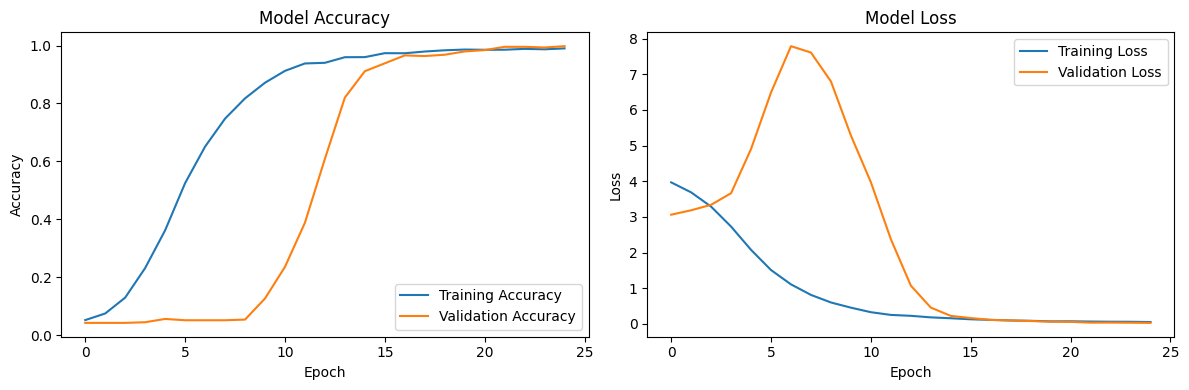

In [23]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = hist_v1.history.get('accuracy', [])
test_acc = hist_v1.history.get('val_accuracy', [])
loss = hist_v1.history.get('loss', [])
test_loss = hist_v1.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [24]:
from tensorflow.keras.models import load_model

# save_model = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\v4.2.7_model1.keras"
# model.save(save_model)

# Load model yang telah disimpan
# new_model = load_model(save_model)

# Evaluate the restored model on the test set
# test_loss, test_acc = new_model.evaluate(X_test, y_test)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 903ms/step - accuracy: 0.9816 - loss: 0.0593
Test Loss: 0.05117802321910858, Test Accuracy: 0.9863636493682861


In [25]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve
from itertools import cycle

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_probabilities = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit jika perlu
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred_probabilities)

# Print metrik evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 737ms/step
Accuracy: 0.9864
Precision: 0.9883
Recall: 0.9864
F1 Score: 0.9867
Log Loss: 2.1093


              precision    recall  f1-score   support

          ba       1.00      0.89      0.94        18
          ca       1.00      1.00      1.00        23
          da       1.00      1.00      1.00        20
         dha       1.00      0.96      0.98        26
          ga       1.00      1.00      1.00        23
          ha       1.00      1.00      1.00        25
          ja       1.00      0.96      0.98        23
          ka       1.00      1.00      1.00        24
          la       0.96      1.00      0.98        27
          Ma       1.00      0.95      0.97        19
          na       1.00      1.00      1.00        19
         nga       1.00      1.00      1.00        24
         nya       1.00      1.00      1.00        17
          pa       1.00      1.00      1.00        13
          ra       1.00      1.00      1.00        23
          sa       1.00      1.00      1.00        27
          ta       1.00      1.00      1.00        19
         tha       0.83    

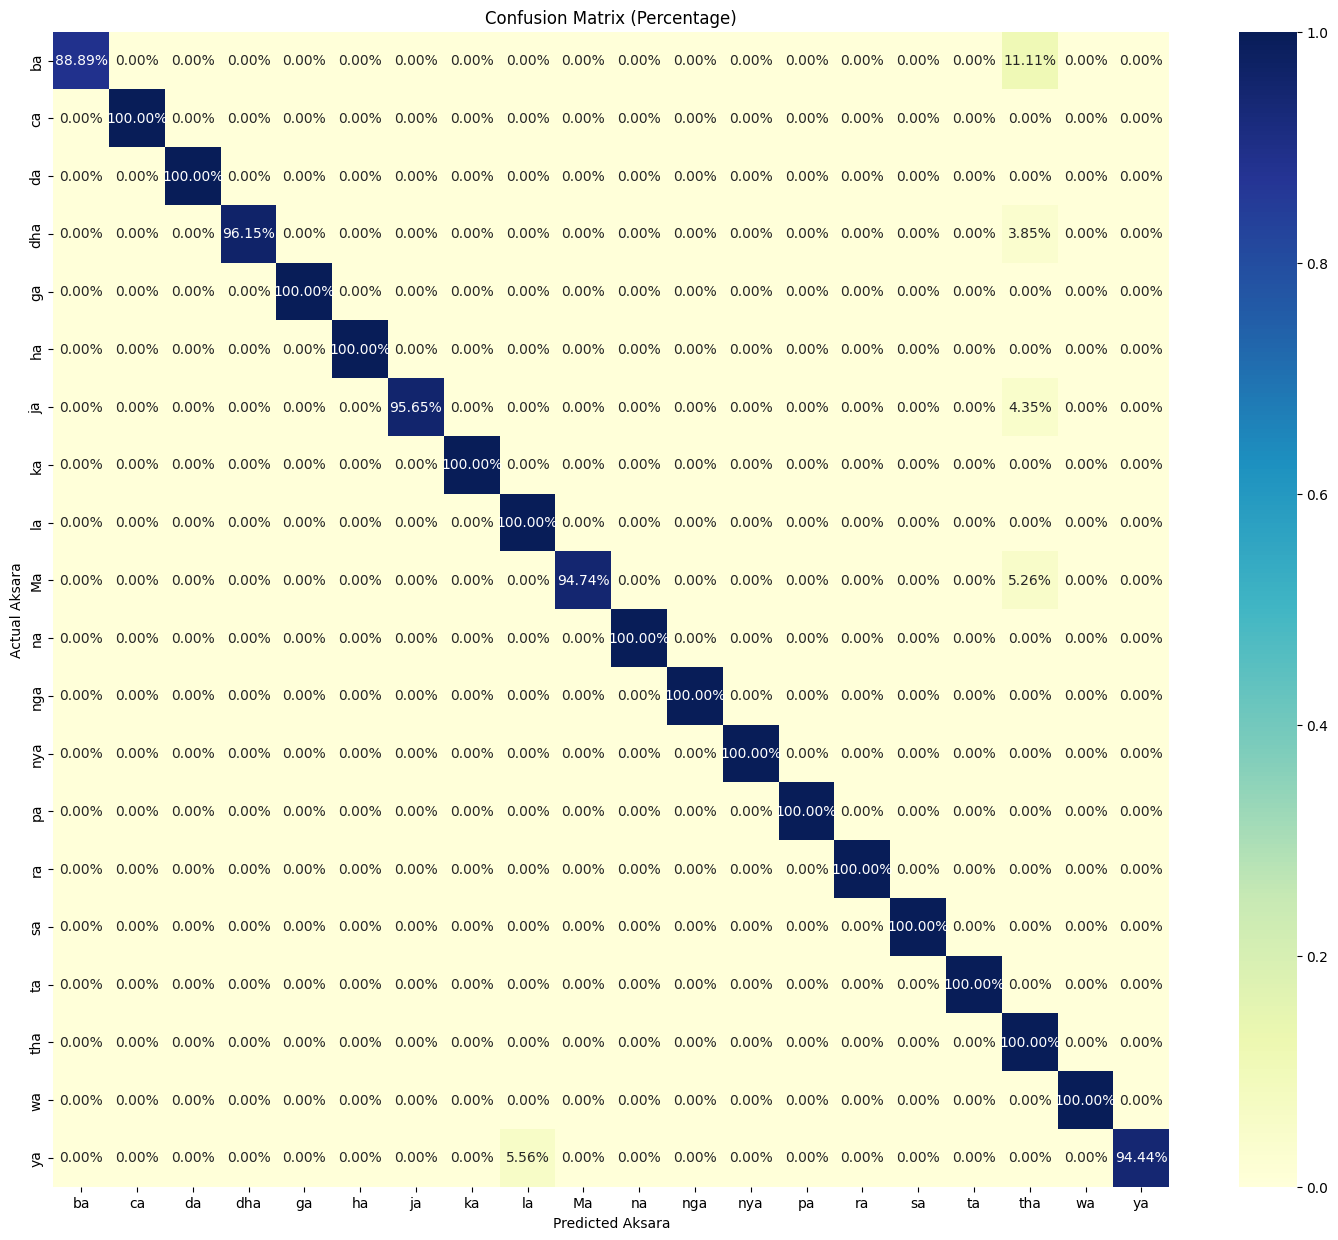

In [26]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Normalisasi confusion matrix untuk mendapatkan persentase
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

AUC-ROC for class ba: 1.0000
AUC-ROC for class ca: 1.0000
AUC-ROC for class da: 1.0000
AUC-ROC for class dha: 1.0000
AUC-ROC for class ga: 1.0000
AUC-ROC for class ha: 1.0000
AUC-ROC for class ja: 1.0000
AUC-ROC for class ka: 1.0000
AUC-ROC for class la: 1.0000
AUC-ROC for class Ma: 1.0000
AUC-ROC for class na: 1.0000
AUC-ROC for class nga: 1.0000
AUC-ROC for class nya: 1.0000
AUC-ROC for class pa: 1.0000
AUC-ROC for class ra: 1.0000
AUC-ROC for class sa: 1.0000
AUC-ROC for class ta: 1.0000
AUC-ROC for class tha: 1.0000
AUC-ROC for class wa: 1.0000
AUC-ROC for class ya: 1.0000


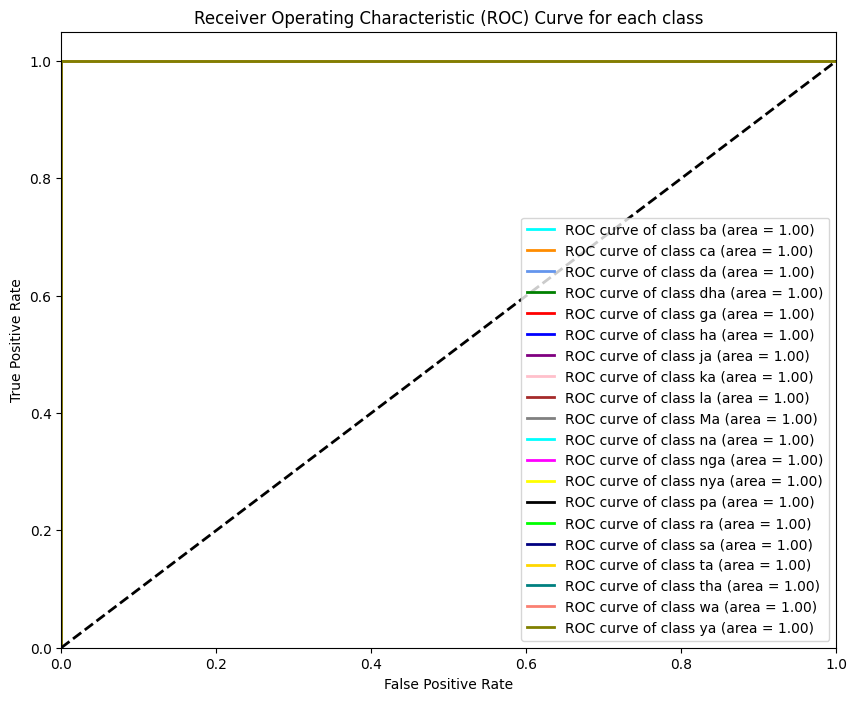

In [27]:
# Hitung AUC-ROC untuk setiap kelas
auc_roc_scores = roc_auc_score(y_test, y_pred_probabilities, average=None)
for idx, score in enumerate(auc_roc_scores):
    print(f"AUC-ROC for class {AKSARA[idx]}: {score:.4f}")

# Tampilkan ROC Curve untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(AKSARA)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'purple', 'pink', 'brown', 'grey', 
                'cyan', 'magenta', 'yellow', 'black', 'lime', 'navy', 'gold', 'teal', 'salmon', 'olive'])

plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {AKSARA[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

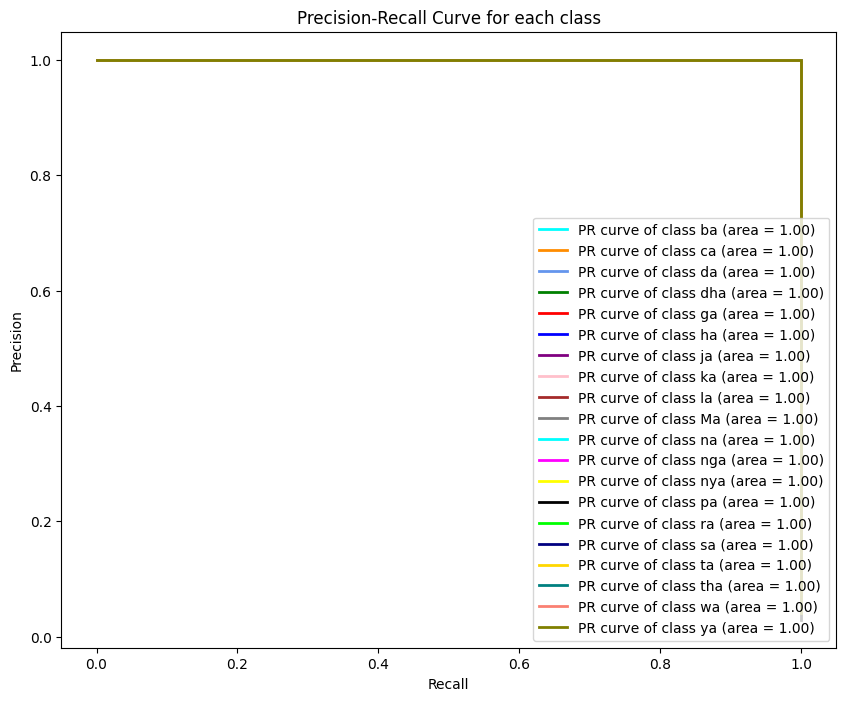

In [28]:
# Hitung AUPRC untuk setiap kelas
average_precision = dict()
precision_recall_curves = dict()

plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    precision_recall_curves[i], recall, _ = precision_recall_curve(y_test[:, i], y_pred_probabilities[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(recall, precision_recall_curves[i], color=color, lw=2, label=f'PR curve of class {AKSARA[i]} (area = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc="lower right")
plt.show()

## Model 2

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import optimizers

# Set hyperparameters tuning
optimizer = 'SGD'
learning_rate = 0.00001
dropout_rate = 0.2
weight_decay = 0.0005
momentum = 0.099
clip_norm = 0.0
num_classes = 20
input_shape = INPUT_SHAPE

def create_model(input_shape, num_classes, optimizer_name, learning_rate, dropout_rate, weight_decay, momentum, clip_norm):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 3
    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(192, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 4
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(dropout_rate))

    # Flatten
    model.add(Flatten())

    # Dense layers
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Define optimizer with hyperparameters
    if optimizer_name == 'SGD':
        optimizer = optimizers.SGD(learning_rate=learning_rate, decay=weight_decay, momentum=momentum, clipnorm=clip_norm)
    elif optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate, decay=weight_decay, clipnorm=clip_norm)
    elif optimizer_name == 'RMSprop':
        optimizer = optimizers.RMSprop(learning_rate=learning_rate, decay=weight_decay, clipnorm=clip_norm)
    else:
        raise ValueError("Optimizer not supported. Choose from 'SGD', 'Adam', or 'RMSprop'.")

    # Compile model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model(input_shape=input_shape, num_classes=num_classes, optimizer_name=optimizer, learning_rate=learning_rate, 
                     dropout_rate=dropout_rate, weight_decay=weight_decay, momentum=momentum, clip_norm=clip_norm)

# Print model summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_104 (Conv2D)             │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_120         │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_121         │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_122         │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_123         │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 8, 8, 192)      │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_124         │ (None, 8, 8, 192)      │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 8, 8, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_125         │ (None, 8, 8, 192)      │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_110 (Conv2D)             │ (None, 8, 8, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_126         │ (None, 8, 8, 192)      │           768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 4, 4, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 4, 4, 192)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_111 (Conv2D)             │ (None, 4, 4, 256)      │       442,624 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 9,746,452 (37.18 MB)

 Trainable params: 9,736,852 (37.14 MB)

 Non-trainable params: 9,600 (37.50 KB)

In [35]:
import pandas as pd
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

# Callback for logging to CSV
class CSVLogger(Callback):
    def __init__(self, filename):
        super(CSVLogger, self).__init__()
        self.filename = filename
        self.epoch = 1  # Mulai dari epoch 1

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['epoch'] = self.epoch
        self.epoch += 1
        df = pd.DataFrame([logs])
        if epoch == 0:
            df.to_csv(self.filename, mode='w', index=False)
        else:
            df.to_csv(self.filename, mode='a', header=False, index=False)

In [42]:
# Function to get the last epoch from CSV
def get_last_epoch(filename):
    try:
        df = pd.read_csv(filename)
        last_epoch = df['epoch'].max()
        return last_epoch
    except FileNotFoundError:
        return 0

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=55, min_lr=1e-4)

# Initialize callbacks
csv_logger = CSVLogger("C:\\Users\\wawn1\\projects_skripsi\\save_models\\save_models_csv\\training_log_v4.3.1_model1.csv")

In [43]:
# Train the model and save the logs to CSV
hist_v2 = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[
        reduce_lr,
        csv_logger
    ]
)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 234s 4s/step - accuracy: 0.0568 - loss: 4.0139 - val_accuracy: 0.0341 - val_loss: 3.0450 - learning_rate: 1.0000e-05 - epoch: 1.0000
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.0541 - loss: 4.0485 - val_accuracy: 0.0341 - val_loss: 3.1633 - learning_rate: 1.0000e-05 - epoch: 2.0000
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.0431 - loss: 4.0880 - val_accuracy: 0.0341 - val_loss: 3.3272 - learning_rate: 1.0000e-05 - epoch: 3.0000
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 240s 4s/step - accuracy: 0.0529 - loss: 4.0049 - val_accuracy: 0.0341 - val_loss: 3.5680 - learning_rate: 1.0000e-05 - epoch: 4.0000
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.0546 - loss: 3.9548 - val_accuracy: 0.0341 - val_loss: 3.5654 - learning_rate: 1.0000e-05 - epoch: 5.0000
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.0495 - loss: 4.0018 - val_accuracy: 0.0432 - val_loss: 3.5016 - learning_rate: 1

In [ ]:
# # Get the last epoch from CSV
# last_epoch = get_last_epoch("C:\\Users\\wawn1\\projects_skripsi\\save_models\\training_log_V4.2.6_model12.csv")

# # Train the model from the last epoch
# hist_v12 = model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=5, 
#     initial_epoch=last_epoch, 
#     batch_size=64,
#     callbacks=[
#         reduce_lr,
#         csv_logger
#     ]
# )

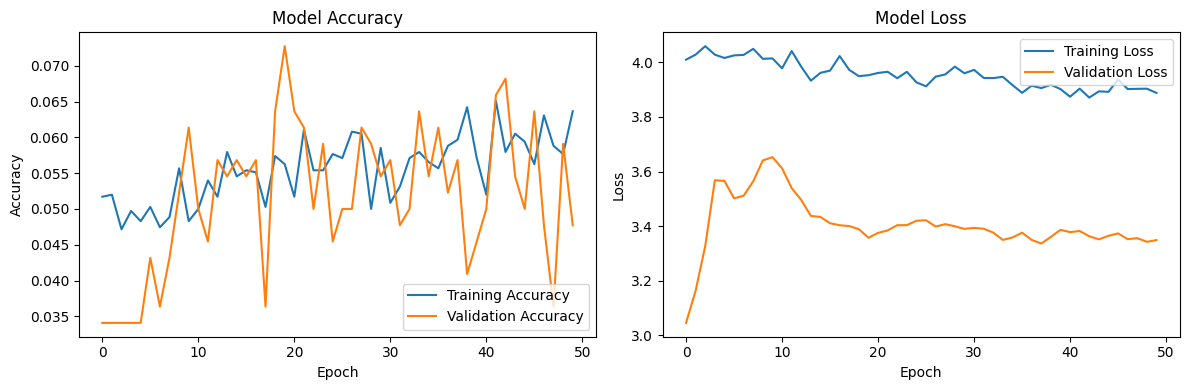

In [44]:
import matplotlib.pyplot as plt

# Memastikan bahwa history_v1.history memiliki data yang diperlukan
acc = hist_v2.history.get('accuracy', [])
test_acc = hist_v2.history.get('val_accuracy', [])
loss = hist_v2.history.get('loss', [])
test_loss = hist_v2.history.get('val_loss', [])

# Menentukan range epochs berdasarkan panjang data akurasi
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training and Testing Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, test_acc, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot Training and Testing Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, test_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Mengatur layout agar rapi
plt.tight_layout()
plt.show()

In [45]:
from tensorflow.keras.models import load_model

# save_model = "C:\\Users\\wawn1\\projects_skripsi\\save_models\\v4.2.7_model1.keras"
# model.save(save_model)

# Load model yang telah disimpan
# new_model = load_model(save_model)

# Evaluate the restored model on the test set
# test_loss, test_acc = new_model.evaluate(X_test, y_test)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 678ms/step - accuracy: 0.0537 - loss: 3.3379
Test Loss: 3.3111302852630615, Test Accuracy: 0.06818182021379471


In [46]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, average_precision_score, precision_recall_curve
from itertools import cycle

# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_probabilities = tf.nn.softmax(y_pred).numpy()  # Terapkan softmax secara eksplisit jika perlu
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
log_loss_value = log_loss(y_true_classes, y_pred_probabilities)

# Print metrik evaluasi
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {log_loss_value:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 485ms/step
Accuracy: 0.0682
Precision: 0.0709
Recall: 0.0682
F1 Score: 0.0417
Log Loss: 2.9899


c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wawn1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

          ba       0.00      0.00      0.00        18
          ca       0.00      0.00      0.00        23
          da       0.00      0.00      0.00        20
         dha       0.33      0.04      0.07        26
          ga       0.11      0.43      0.18        23
          ha       0.00      0.00      0.00        25
          ja       0.09      0.22      0.13        23
          ka       0.50      0.08      0.14        24
          la       0.00      0.00      0.00        27
          Ma       0.00      0.00      0.00        19
          na       0.00      0.00      0.00        19
         nga       0.09      0.04      0.06        24
         nya       0.00      0.00      0.00        17
          pa       0.08      0.15      0.10        13
          ra       0.00      0.00      0.00        23
          sa       0.00      0.00      0.00        27
          ta       0.00      0.00      0.00        19
         tha       0.06    

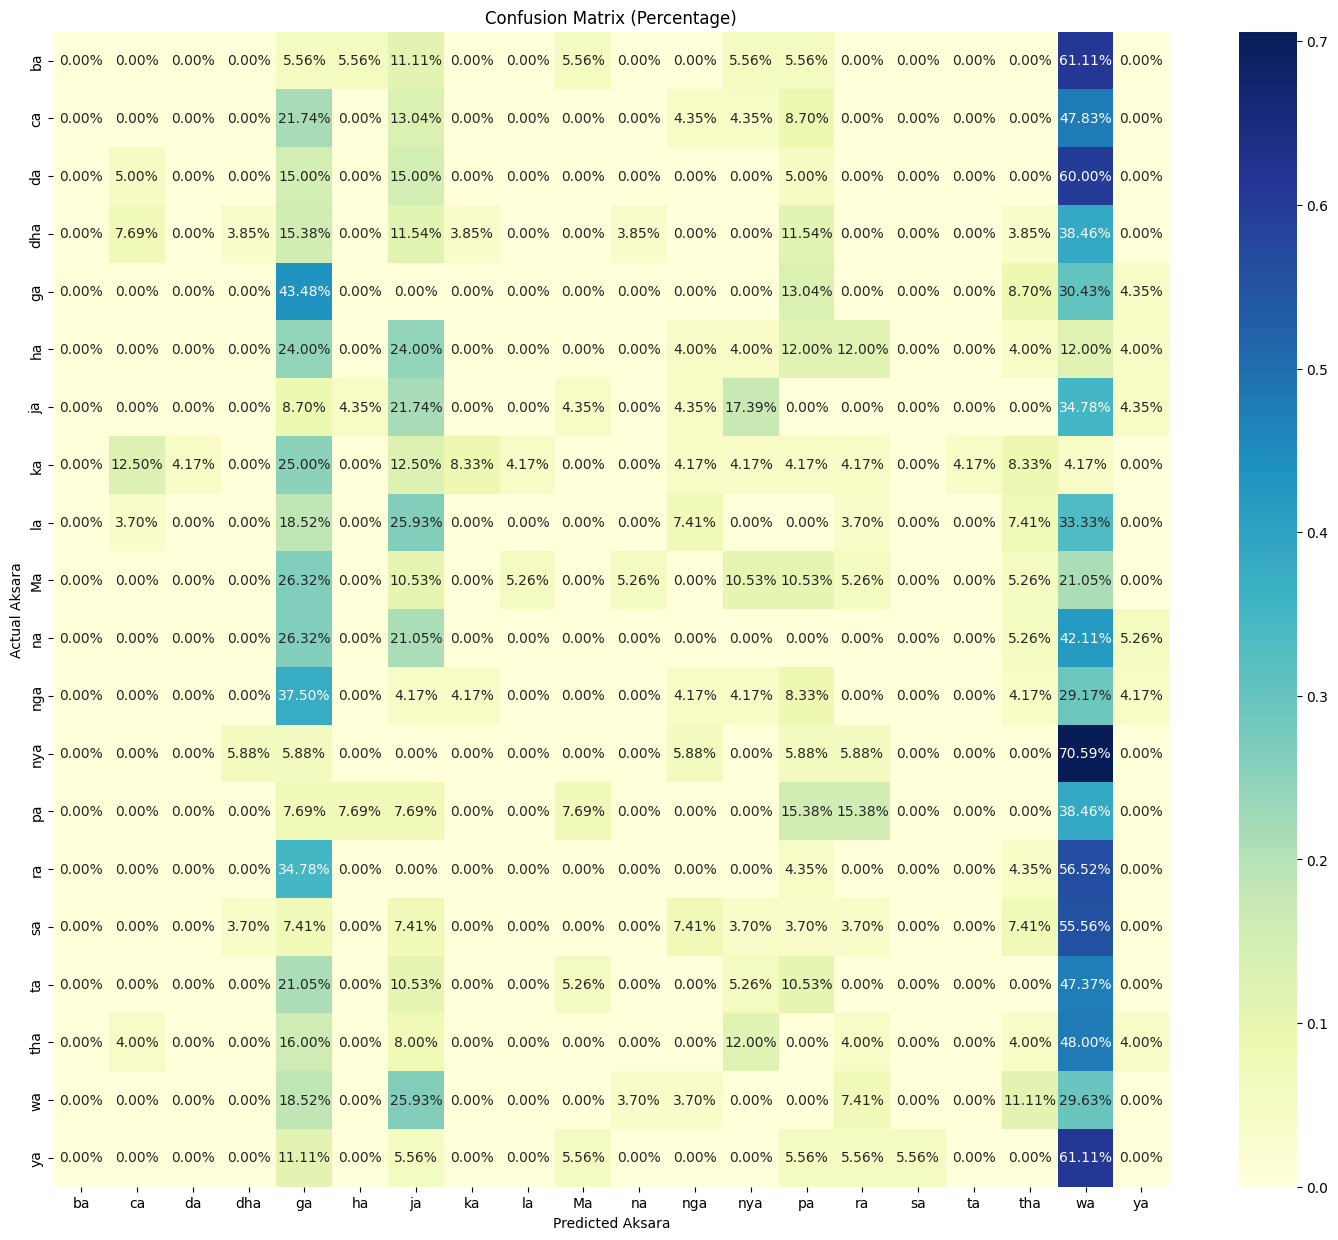

In [47]:
# Tampilkan classification report yang lengkap
report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Normalisasi confusion matrix untuk mendapatkan persentase
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [ ]:
# # Tampilkan classification report yang lengkap
# report = classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
# print(report)

# # Confusion Matrix
# conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# total_per_class = np.sum(conf_matrix, axis=1)

# cm_percent = (conf_matrix.astype('float') / total_per_class[:, np.newaxis]) * 100

# plt.figure(figsize=(15, 15))
# sns.heatmap(cm_percent/np.sum(cm_percent), annot=True, fmt=".2%", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
# plt.xlabel("Predicted Aksara")
# plt.ylabel("Actual Aksara")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()

AUC-ROC for class ba: 0.5299
AUC-ROC for class ca: 0.5086
AUC-ROC for class da: 0.5749
AUC-ROC for class dha: 0.5669
AUC-ROC for class ga: 0.7450
AUC-ROC for class ha: 0.5342
AUC-ROC for class ja: 0.6410
AUC-ROC for class ka: 0.6218
AUC-ROC for class la: 0.5600
AUC-ROC for class Ma: 0.5356
AUC-ROC for class na: 0.5818
AUC-ROC for class nga: 0.4779
AUC-ROC for class nya: 0.5944
AUC-ROC for class pa: 0.5783
AUC-ROC for class ra: 0.6470
AUC-ROC for class sa: 0.5444
AUC-ROC for class ta: 0.6341
AUC-ROC for class tha: 0.4495
AUC-ROC for class wa: 0.4513
AUC-ROC for class ya: 0.4405


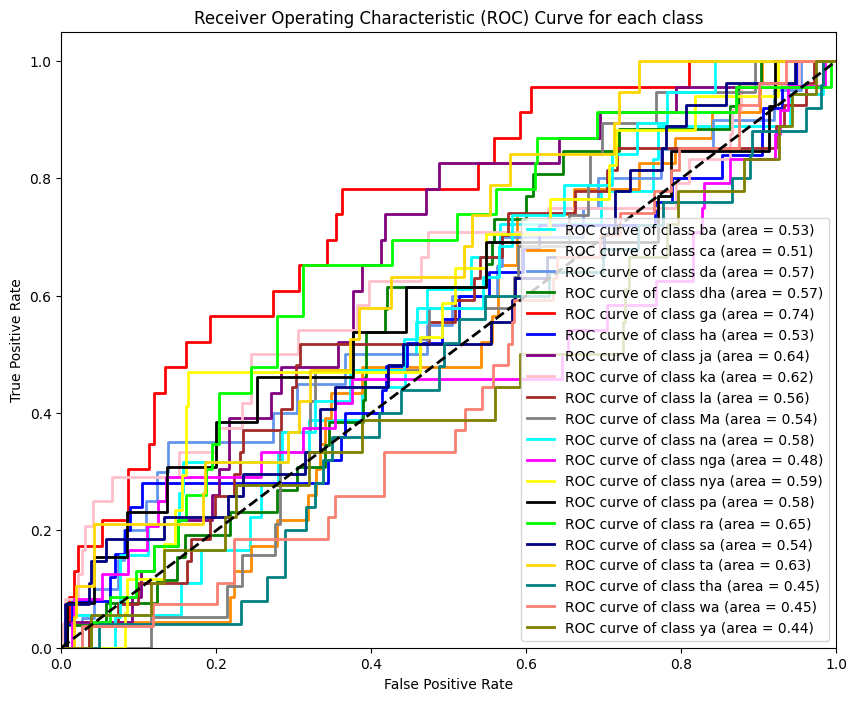

In [48]:
# Hitung AUC-ROC untuk setiap kelas
auc_roc_scores = roc_auc_score(y_test, y_pred_probabilities, average=None)
for idx, score in enumerate(auc_roc_scores):
    print(f"AUC-ROC for class {AKSARA[idx]}: {score:.4f}")

# Tampilkan ROC Curve untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(AKSARA)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'blue', 'purple', 'pink', 'brown', 'grey', 
                'cyan', 'magenta', 'yellow', 'black', 'lime', 'navy', 'gold', 'teal', 'salmon', 'olive'])

plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_probabilities[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {AKSARA[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

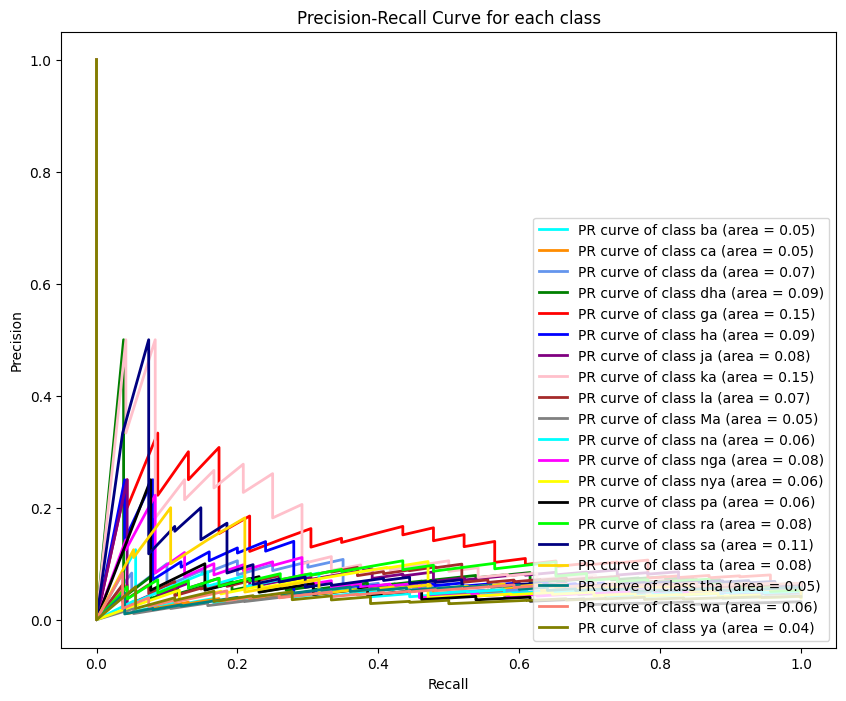

In [49]:
# Hitung AUPRC untuk setiap kelas
average_precision = dict()
precision_recall_curves = dict()

plt.figure(figsize=(10, 8))

for i, color in zip(range(n_classes), colors):
    precision_recall_curves[i], recall, _ = precision_recall_curve(y_test[:, i], y_pred_probabilities[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred_probabilities[:, i])
    plt.plot(recall, precision_recall_curves[i], color=color, lw=2, label=f'PR curve of class {AKSARA[i]} (area = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc="lower right")
plt.show()